In [2]:
from matplotlib.pylab import *

In [47]:
style.use(['dark_background', 'bmh'])
rc('axes', facecolor='k')
rc('figure', facecolor='k')
rc('figure', figsize=(10,5))

In [35]:
y = r_[-1:3.1:.1]

In [54]:
target_lane_cost = y ** 2 / 4

In [52]:
r, g, b, p = 'C1', 'C3', 'C0', 'C2'
set_color = lambda c: dict(linefmt=c, markerfmt='o'+c)

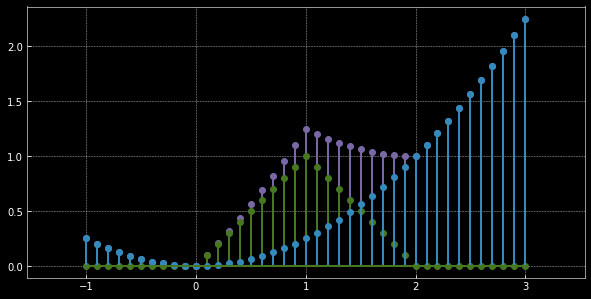

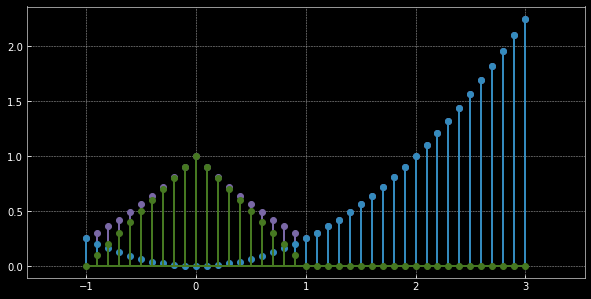

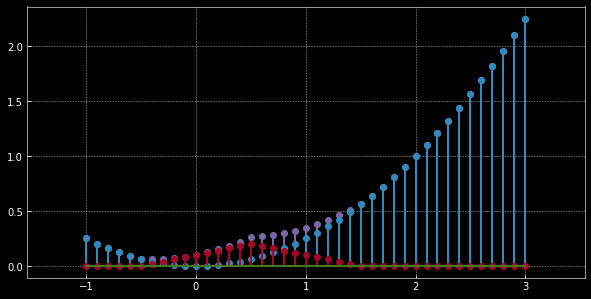

In [60]:
figure()
y_proximity = maximum(1 - abs(1 - y), 0)
stem(y, target_lane_cost + y_proximity, **set_color(p))
stem(y, y_proximity, **set_color(g))
stem(y, target_lane_cost, **set_color(b))
axis('equal')
savefig('car_1_left.png')
figure()
y_proximity = maximum(1 - abs(0 - y), 0)
stem(y, target_lane_cost + y_proximity, **set_color(p))
stem(y, target_lane_cost, **set_color(b))
stem(y, y_proximity, **set_color(g))
axis('equal')
savefig('car_2_left.png')
figure()
lane_cost = maximum(1 - abs(0.5 - y), 0) * .2
stem(y, target_lane_cost + lane_cost, **set_color(p))
stem(y, target_lane_cost, **set_color(b))
stem(y, lane_cost, **set_color(r))
axis('equal')
savefig('lane_change.png')